<a href="https://colab.research.google.com/github/Girvar-6111/Internship/blob/main/Digitrecogni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow matplotlib

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0378 - accuracy: 0.9889 - val_loss: 0.0847 - val_accuracy: 0.9757
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 0.0955 - val_accuracy: 0.9722
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.1026 - val_accuracy: 0.9731
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.0914 - val_accuracy: 0.9758
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.0899 - val_accuracy: 0.9768


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9785
Test accuracy: 0.9785000085830688


313/313 [==============================] - 1s 2ms/step


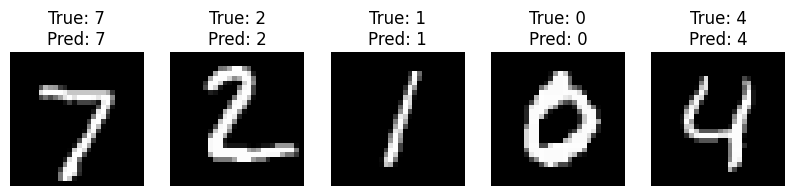

In [17]:
predictions = model.predict(x_test)

# Function to plot the first 5 test images, their predicted labels, and the true labels
def plot_images(images, labels, predictions=None):
    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        true_label = labels[i].argmax()
        pred_label = predictions[i].argmax() if predictions is not None else true_label
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off')

plot_images(x_test, y_test, predictions)
plt.show()